# **Evaluate classification results produced from model**

In [1]:
# enter model path and filenames
model_name = 'EfficientNet'
model_path = '/home/ubuntu/michael/model_output/EfficientNet/day/'
#model_path = '/home/ubuntu/michael/model_output/EfficientNet/night/'
model_score = 'EfficientNet_score.pkl'
history_file = 'EfficientNet_history.pkl'
model_file = 'EfficientNet_model.hdf5'

## **Access data saved during testing**

In [2]:
import pandas as pd

In [3]:
# open pickle file with score object (validation loss and accuracy during training)
score = pd.read_pickle(model_path + model_score)
score[0] = round(score[0], 4)
score[1] = round(score[1], 4)
print(f'Validation Accuracy: {score[1]}, Validation Loss: {score[0]} for {model_name} model')

Validation Accuracy: 0.7679, Validation Loss: 0.5991 for EfficientNet model


In [4]:
# create dataframe from pickle file of history object containig accuracy and loss values during trainingand create dataframe
history = pd.read_pickle(model_path + history_file)
history

,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy
0,0.776250,0.487179,0.670068,0.678571
1,0.748555,0.498328,0.663371,0.678571
2,0.745718,0.509476,0.657978,0.687500
3,0.714185,0.540691,0.651450,0.803571
4,0.735910,0.523969,0.647232,0.803571
5,0.739196,0.534002,0.636729,0.812500
6,0.706332,0.555184,0.645632,0.491071
7,0.711699,0.573021,0.630100,0.821429
8,0.740012,0.527313,0.635871,0.767857
9,0.746540,0.529543,0.629964,0.821429


## **Visualize accuracy and loss during training**

In [5]:
import matplotlib.pyplot as plt
import sys

In [6]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history['Training Loss'], color='blue', label='train')
    plt.plot(history['Validation Loss'], color='orange', label='validation')
    plt.legend()
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history['Training Accuracy'], color='blue', label='train')
    plt.plot(history['Validation Accuracy'], color='orange', label='validation')
    plt.legend()
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

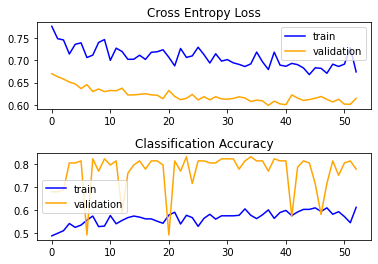

In [7]:
summarize_diagnostics(history)

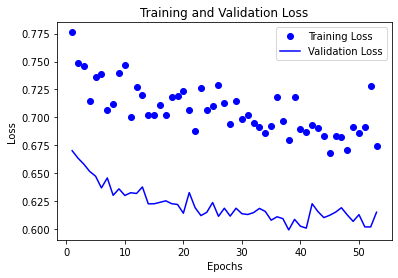

In [8]:
# plot training and validation loss
history_dict = history
history_dict.keys()
loss_values = history_dict['Training Loss']
val_loss_values = history_dict['Validation Loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

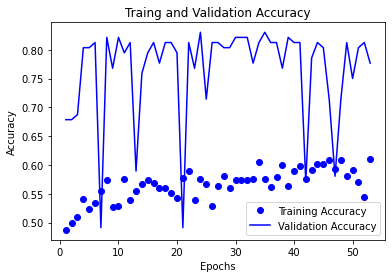

In [9]:
# plot training and validation accuracy
plt.clf() # clear figure
acc = history_dict['Training Accuracy']
val_acc = history_dict['Validation Accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Traing and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Load test dataset**

In [10]:
# point to test image directory
#test_dir = '/home/ubuntu/michael/day/test' # day images only
test_dir = '/home/ubuntu/michael/night/test' # night images only

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [12]:
# set input size of images based on model specs
img_size = (224, 224)
img_shape = (224, 224, 3)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0) #scale 

In [14]:
test_it = test_datagen.flow_from_directory(directory = test_dir, classes = ['nofog', 'fog'], class_mode = 'binary', # validation_iterator
                    batch_size = 16, target_size=img_size)

Found 291 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in test_it:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    break

data batch shape: (16, 224, 224, 3)
labels batch shape: (16,)


In [16]:
test_it.class_indices

{'nofog': 0, 'fog': 1}

In [17]:
test_it.labels # displays an array of 0s and 1s for the assigned label for each image

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

## **Load model used**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [19]:
from tensorflow.keras.applications import EfficientNetB6
conv_base = EfficientNetB6(weights="imagenet", include_top=False, input_shape = img_shape)
conv_base.trainable = False

In [20]:
model = Sequential()
model.add(conv_base)
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb6 (Functional)  (None, 7, 7, 2304)        40960143  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 2304)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              21234688  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 62,195,856
Trainable params: 21,235,713
Non-trainable params: 40,960,143
___________________________________

In [22]:
# compile model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=1e-6, decay=1e-6), metrics = ['acc'])

In [23]:
# evaluate model
score = model.evaluate(test_it, steps=len(test_it), verbose = 1)
loss = round(score[0], 4)
accuracy = round(score[1], 4)
print(f'Loss: {loss}, Accuracy: {accuracy}')

19/19 [==============================] - 55s 1s/step - loss: 0.7557 - acc: 0.5055
Loss: 0.7789, Accuracy: 0.4742


## **Load model weights**

In [24]:
import h5py    
import numpy as np 

In [25]:
# load weights from checkpoint
model.load_weights(model_path + model_file)

In [26]:
with h5py.File(model_path + model_file, 'r') as f:
    # list all groups
    print('Keys: %s' % f.keys())
    a_group_key = list(f.keys())[0]
    
    # get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [27]:
# re-evaluate model
score = model.evaluate(test_it, steps=len(test_it), verbose = 2)
loss = round(score[0], 4)
accuracy = round(score[1], 4)
print(f'Loss: {loss}, Accuracy: {accuracy}')

19/19 - 3s - loss: 0.6377 - acc: 0.8385
Loss: 0.6377, Accuracy: 0.8385


## **Confusion Matrix**

In [28]:
# point to source directory and file
src_dir = '/home/ubuntu/michael/my_pickles/'
infile = 'night_test_df.pkl' # night only dataframe
#infile = 'day_test_df.pkl' # day only dataframe

In [29]:
# assign saved dataframe to sample dataframe 
test_df = pd.read_pickle(src_dir + infile)
test_df

,filename,label,day_phase,phase,filepath,y_true
2617,A9-HM430-ID12784_20190402_0241.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A9-...,0
2618,A9-HM443-ID12790_20191231_2241.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A9-...,1
2619,A4-HM697-ID12278_20170915_2031.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A4-...,0
2620,A50-HM1852-ID11644_20200122_2320.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A50...,0
2621,A16-HM264-ID12263_20200123_0140.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A16...,1
...,...,...,...,...,...,...
2903,A9-HM469-ID12805_20190814_0130.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A9-...,0
2904,A50-HM1941-ID11612_20200122_2311.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A50...,1
2905,A50-HM1894-ID11530_20200101_0621.jpg,Fog,20,Night,/home/ubuntu/michael/nl_images/images_data/A50...,1
2906,A50-HM1924-ID11541_20190812_0140.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A50...,1


In [30]:
# create a list of the ground-truth labels
labels = test_df.y_true.tolist()
type(labels)
len(labels)

291

In [31]:
# visualize classes count
test_df.groupby('label').count()

,filename,day_phase,phase,filepath,y_true
label,,,,,
Fog,153,153,153,153,153
No Fog,138,138,138,138,138


In [32]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import os

In [33]:
# image source location
src = '/home/ubuntu/backup_images_2/images01062021'

In [34]:
# import images and convert to arrays for prediction
image_list = []
for filepath in test_df.filepath.values:
    fn = os.path.basename(filepath)
    fp = os.path.join(src, fn)
    img = load_img(fp, target_size = img_size)
    img = img_to_array(img)
    img = img / 255.
    image_list.append(img)
images = np.asarray(image_list)
images.shape

(291, 224, 224, 3)

## **Make probability predictions for test set**

In [35]:
probabilities = model.predict(images)
len(probabilities)

291

In [36]:
probabilities.max()

0.5549798

In [37]:
probabilities.min()

0.34049952

In [38]:
y_pred = (probabilities > 0.5).astype('int32')
len(y_pred)

291

In [39]:
y_true = test_df['y_true']
#y_pred = y_pred.tolist()

In [40]:
y_test = test_df['y_true']
len(y_test)

291

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc

In [42]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
print(thresholds)

[0 1]


In [43]:
precision

array([0.5257732 , 0.82317073, 1.        ])

In [44]:
recall

array([1.        , 0.88235294, 0.        ])

In [45]:
auc_score = auc(recall, precision)
auc_score

0.8836896714934402

In [46]:
prerec_df = pd.DataFrame()
prerec_df['Precision'] = precision
prerec_df['Recall'] = recall
prerec_df

,Precision,Recall
0,0.525773,1.000000
1,0.823171,0.882353
2,1.000000,0.000000


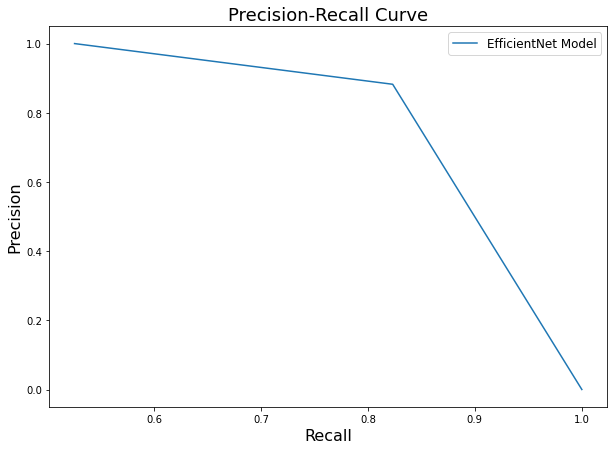

In [64]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(precision, recall, label = 'EfficientNet Model')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.ylabel('Precision', fontsize = 16)
plt.xlabel('Recall', fontsize = 16)
plt.legend(fontsize = 12, loc = 'upper right')
plt.savefig(model_path + 'Eff_prerec.jpg')

## **Create dataframe of probabilities and original labels**

In [48]:
# create a list of test image probabilities
t_img_prob = []
for index, probability in enumerate(probabilities):
    prob = probabilities[index][0]
    t_img_prob.append(prob)

In [49]:
# create lists of test image filepaths
t_img_fps = [] # test image filepaths
for i, image in enumerate(test_df.filepath.values):
    t_img_fps.append(image)
    
# store filepaths in dataframe
t_img_df = pd.DataFrame()
t_img_df['Filepath'] = t_img_fps
t_img_df['Label'] = labels
t_img_df['Probability'] = t_img_prob
t_img_df.head()

,Filepath,Label,Probability
0,/home/ubuntu/michael/nl_images/images_data/A9-...,0,0.355141
1,/home/ubuntu/michael/nl_images/images_data/A9-...,1,0.544595
2,/home/ubuntu/michael/nl_images/images_data/A4-...,0,0.498947
3,/home/ubuntu/michael/nl_images/images_data/A50...,0,0.461638
4,/home/ubuntu/michael/nl_images/images_data/A16...,1,0.501736


## **Identify and visualize test images with High probability of being fog**

In [50]:
# subset dataframe for test images with high probability of being fog
t_img_hprob_df = t_img_df[t_img_df.Probability >= 0.50]

# extract a random sample of 12 images for visualization
hprob_sample_df = t_img_hprob_df.sample(n = 16, replace = False, axis=None)

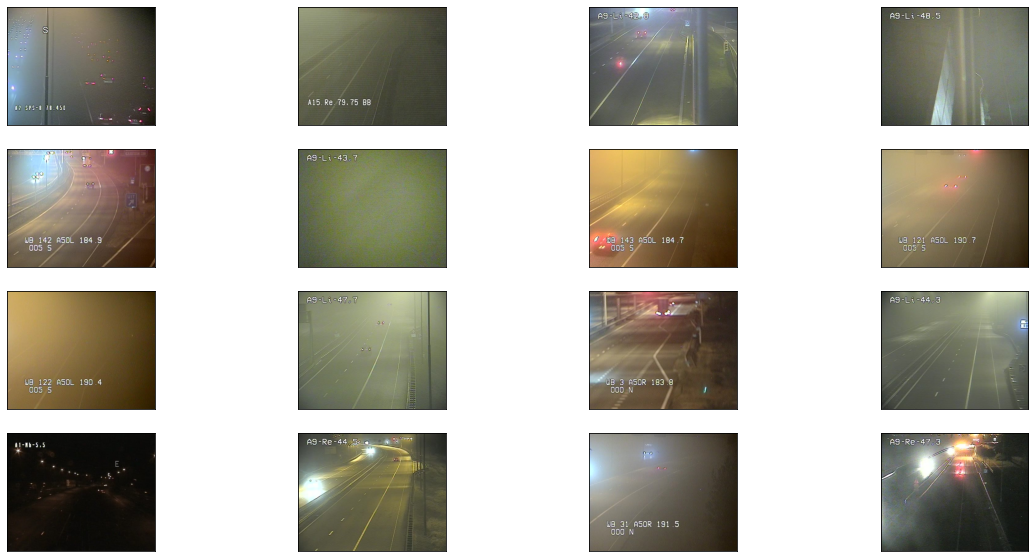

In [54]:
# visualize images identified as high probabiity of being fog
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(hprob_sample_df.Filepath):
    fn = os.path.basename(path)
    fp = os.path.join(src, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)

## **Identify and visualize test images with Low probability of being fog**

In [56]:
# subset dataframe for test images with low probability of being fog
t_img_lprob_df = t_img_df[t_img_df.Probability < 0.50]

# extract a random sample of 12 images for visualization
lprob_sample_df = t_img_lprob_df.sample(n = 8, replace = True, axis=None)

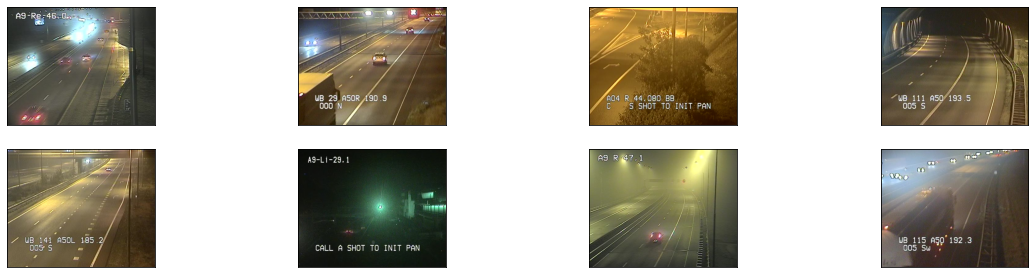

In [57]:
# visualize images identified as low probabiity of being fog
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(lprob_sample_df.Filepath):
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)

## **Identify and visualize test images with that are borderline cases fog**

In [58]:
# subset dataframe for test images that are borderline
t_img_bprob_df = t_img_df[(t_img_df.Probability >= 0.49) & (t_img_df.Probability <= 0.51)]
len(t_img_bprob_df)

50

ValueError: num must be 1 <= num <= 16, not 17

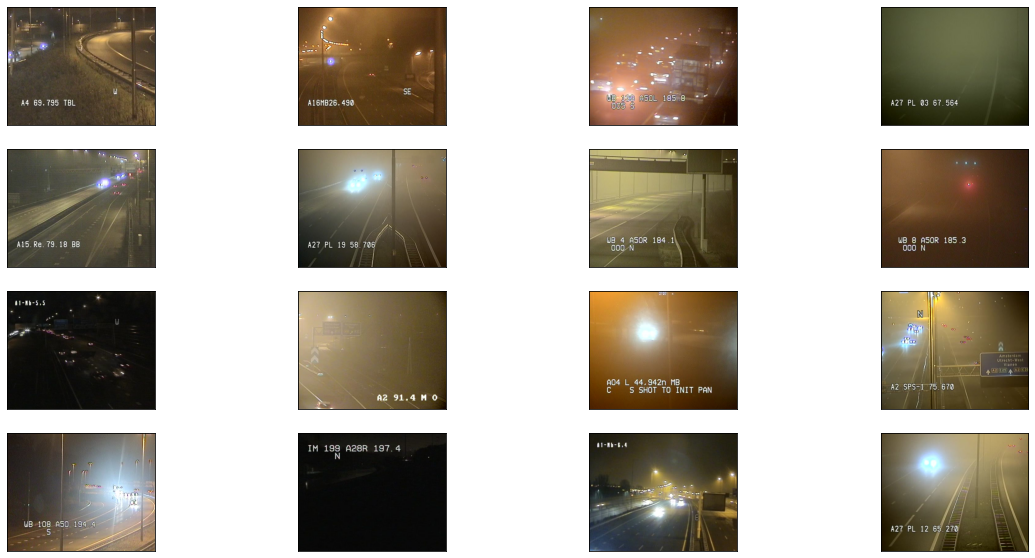

In [59]:
# visualize images identified as being borderline cases
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(t_img_bprob_df.Filepath):
    fn = os.path.basename(path)
    fp = os.path.join(src, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)

## **Build confusion matrix and visualize metrics**

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [61]:
# force all values greater than 0.5 to be 1 for fog since it is class A
y_pred = (probabilities > 0.5).astype('int32')

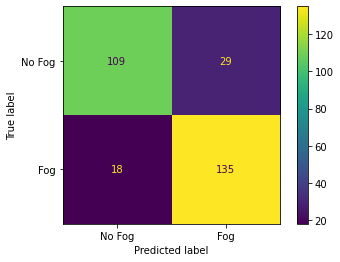

In [62]:
labels = ['No Fog', 'Fog']
y_true = test_df.y_true.to_list()
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()

In [63]:
from sklearn.metrics import classification_report

cr = classification_report(y_true, y_pred, target_names=labels)
print(cr)

              precision    recall  f1-score   support

      No Fog       0.86      0.79      0.82       138
         Fog       0.82      0.88      0.85       153

    accuracy                           0.84       291
   macro avg       0.84      0.84      0.84       291
weighted avg       0.84      0.84      0.84       291



## **Create ROC graph and display AUC**

In [96]:
probs = np.array(probabilities)
probs.shape # (291, )
probs = probs.tolist()

In [97]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_true, y_pred)
auc = auc(fpr, tpr)
auc

0.8324097755044046

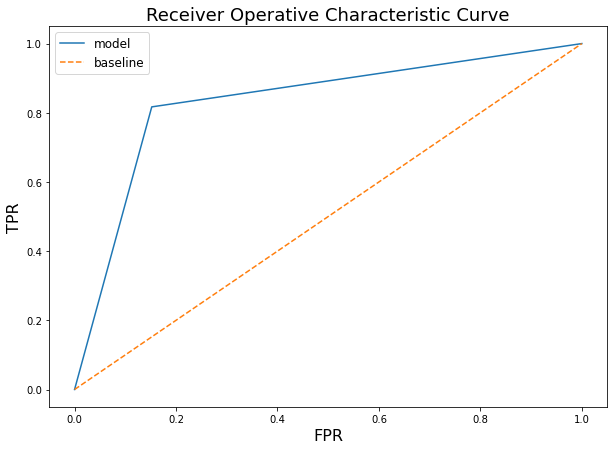

In [101]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(fpr, tpr, label = 'model')
ax.plot(np.linspace(0, 1, 100),
        np.linspace(0, 1, 100),
        label = 'baseline',
        linestyle = '--')
plt.title('Receiver Operative Characteristic Curve', fontsize = 18)
plt.ylabel('TPR', fontsize = 16)
plt.xlabel('FPR', fontsize = 16)
plt.legend(fontsize = 12)

## **Identify and visualize False Positives**

In [102]:
# image source location
src = '/home/ubuntu/backup_images_2/images01062021'

In [103]:
# assignment of actual and prediction values
test_df['y_true'] = y_true
test_df['y_pred'] = y_pred

# find images in test dataframe that are false positive
fp = test_df[(test_df.y_true == 0) & (test_df.y_pred == 1)]
len(fp)

21

In [104]:
# get the list of false positive filenames
fp_filenames = fp.filename.values
len(fp_filenames)

21

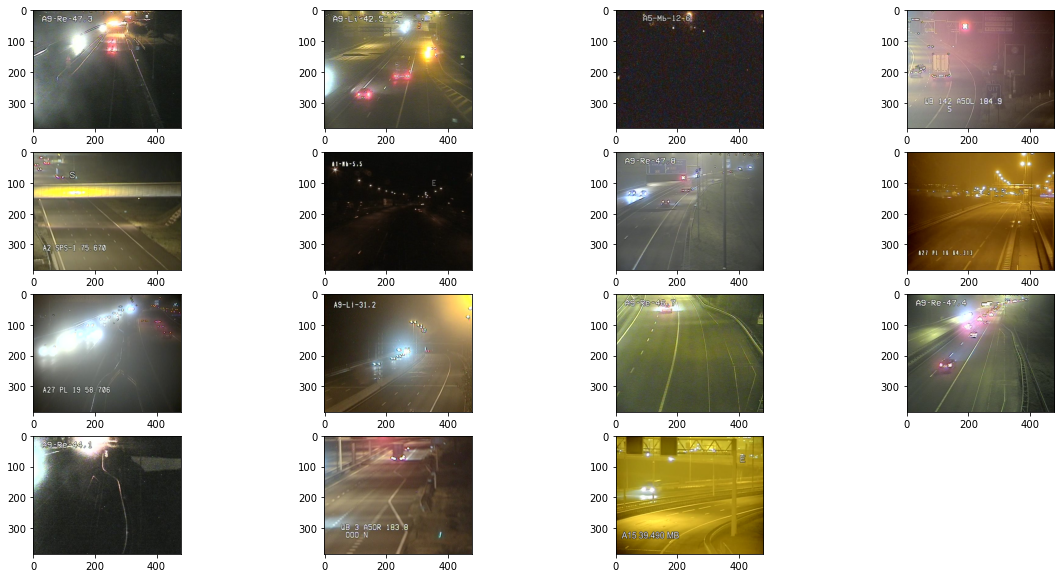

In [105]:
# visualize the false positives
rows = 4
cols = 4
axes =[]

fig = plt.figure(figsize = (20, 10))

for i in range((rows*cols)-1):
    path = os.path.join(src + '/' + fp_filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1)) # add 1 b/c 
    plt.imshow(img)

## **Identify and visualize false negatives**

In [106]:
# assignment of actual and prediction values
test_df['y_true'] = y_true
test_df['y_pred'] = y_pred

# find images in test dataframe that are false positive
fn = test_df[(test_df.y_true == 1) & (test_df.y_pred == 0)]
len(fn)

28

In [107]:
# get the list of false negative filenames
fn_filenames = fn.filename.values
len(fn_filenames)

28

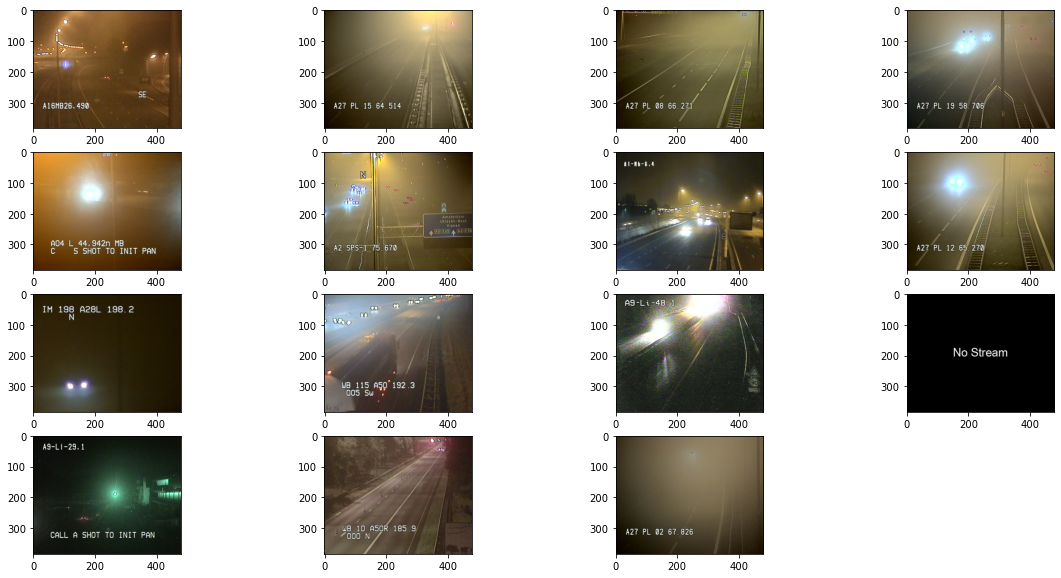

In [108]:
# visualize the false negative images
path = test_dir
rows = 4
cols = 4
axes =[]

fig = plt.figure(figsize = (20, 10))

for i in range((rows*cols)-1):
    path = os.path.join(test_dir + '/fog/' + fn_filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1)) # add 1 b/c 
    plt.imshow(img)